**Iris Dataset**

```
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
```



In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris.target

In [ ]:
list(iris.target_names)

In [ ]:
import pandas as pd
iris_df= pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df ['target'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [ ]:
iris_df.describe()

Eigenvalues in decreasing order:

1581.3259321867617
13.600776328162208
2.4043520410991714e-13
1.5464006568405534e-13


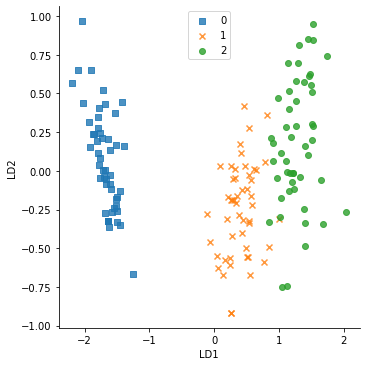

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4)

# 1º passo: Dataset
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(file_path, header=None)
df.head()

# Label Encoder
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)

# 2º Passo: Standardize features
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:, range(0, 4)].values)

# 3º Passo: Matriz de Covariância S_W
S_W = np.zeros((4, 4))
for i in range(3):
    S_W += np.cov(X_train_std[y == i].T)

# 4º passo: Between-class scatter matrix S_B
N = np.bincount(y)  # number of samples for given class
vecs = []
[vecs.append(np.mean(X_train_std[y == i], axis=0)) for i in range(3)]  # class means
mean_overall = np.mean(X_train_std, axis=0)  # overall mean
S_B = np.zeros((4, 4))
for i in range(3):
    S_B += N[i] * (((vecs[i] - mean_overall).reshape(4, 1)).dot(((vecs[i] - mean_overall).reshape(1, 4))))

# 5º passo: Autovalores e Autovetores
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Autovalores na ordem decrescente:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

# LDA components
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]


# Project original features onto the new feature space
W = np.hstack((eigen_pairs[0][1][:, ].reshape(4, 1), eigen_pairs[1][1][:, ].reshape(4, 1))).real
X_train_lda = X_train_std.dot(W)

# Gráfico
data = pd.DataFrame(X_train_lda)
data['class'] = y
data.columns = ["LD1", "LD2", "class"]
data.head()

markers = ['s', 'x', 'o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers, fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()
